### NOTEARS vs OMP on SEM, different variants (noise type, sparsity)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import scipy.stats as scistats
import sys
sys.path.append("..")

import helper.helper as h
import helper.methods as m

from notears.notears.notears import utils 

from importlib import reload  # Python 3.4+

In [212]:
Ps = range(1, 101)
Ps_OMP, Ps_NT = [], []

OMP_means, OMP_ses = [], []
NT_means, NT_ses = [], []

# folder name
# folder_name = "benchmarks/1p edges gauss noise 1000 samples"                     # ER-1 Gauss, T = 1000
# folder_name = "benchmarks/2p edges gauss noise large"                     # ER-2 Gauss, T = 1000
# folder_name = "benchmarks/4p edges gauss noise 1000 samples"                # ER-4 Gauss, T = 1000

# folder_name = "benchmarks/2p edges exp noise"                             # ER-2 Exp, T = 1000, zero-mean
# folder_name_2 = "benchmarks/2p edges exp noise/no normalization OMP"        # ER-2 Exp, T = 1000, not zero-mean

# folder_name = "benchmarks/1p edges gauss noise 20 samples"                # ER-1 Gauss, T = 20
# folder_name = "benchmarks/2p edges gauss noise 20 samples"                # ER-2 Gauss, T = 20
# folder_name = "benchmarks/4p edges gauss noise 20 samples"                # ER-4 Gauss, T = 20

# folder_name = "benchmarks/SF graphs/1p edges gauss noise 20 samples"      # SF-1 Gauss, T = 20
# folder_name = "benchmarks/SF graphs/4p edges gauss noise 20 samples"      # SF-4 Gauss, T = 20
folder_name = "benchmarks/SF graphs/1p edges gauss noise 1000 samples"      # SF-1 Gauss, T = 1000

u_lim = 7
# load data
for p in Ps:
    
    try:
        OMP_data = np.loadtxt(f"{folder_name}/r_OMP_{p}.txt")[:u_lim]
        Ps_OMP.append(p)
        OMP_means.append(np.mean(OMP_data, axis = 1))
        OMP_ses.append(scistats.sem(OMP_data, axis = 1))
    except OSError:
        pass
    
    try:
        NT_data = np.loadtxt(f"{folder_name}/r_NT_{p}.txt")[:u_lim]
        Ps_NT.append(p)
        
        if np.shape(NT_data)[0] == len(NT_data.flatten()): 
            NT_means.append(NT_data)
            NT_ses.append(np.zeros(u_lim))
        else:
            NT_means.append(np.mean(NT_data, axis = 1))
            NT_ses.append(scistats.sem(NT_data, axis = 1))
    except OSError:
        pass

OMP_means = np.array(OMP_means)
OMP_ses = np.array(OMP_ses)
NT_means = np.array(NT_means)
NT_ses = np.array(NT_ses)

print(len(Ps_NT))
print(np.shape(OMP_means))
print(np.shape(NT_means))

5
(5, 7)
(5, 7)


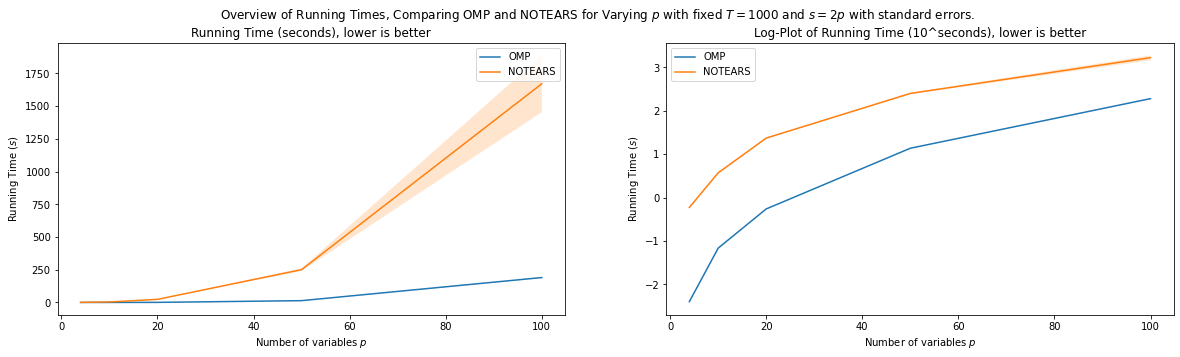

In [209]:
fig, axs = plt.subplots(1, 2, figsize = (20, 5))
fig.suptitle("Overview of Running Times, Comparing OMP and NOTEARS for Varying $p$ with fixed $T = 1000$ and $s = 2p$ with standard errors.")
titles = ['Running Time (seconds), lower is better', 'Log-Plot of Running Time (10^seconds), lower is better']

axs[0].plot(Ps_OMP, OMP_means[:, 0], label = "OMP")
axs[0].fill_between(Ps_OMP, OMP_means[:, 0] - OMP_ses[:, 0], OMP_means[:, 0] + OMP_ses[:, 0], alpha = 0.2)

axs[1].plot(Ps_OMP, np.log10(OMP_means[:, 0]), label = "OMP")
axs[1].fill_between(Ps_OMP, np.log10(OMP_means[:, 0] - OMP_ses[:, 0]), np.log10(OMP_means[:, 0] + OMP_ses[:, 0]), alpha = 0.2)

if len(Ps_NT) > 0:
    axs[0].plot(Ps_NT, NT_means[:, 0], label = "NOTEARS")
    axs[0].fill_between(Ps_NT, NT_means[:, 0] - NT_ses[:, 0], NT_means[:, 0] + NT_ses[:, 0], alpha = 0.2)
    
    axs[1].plot(Ps_NT, np.log10(NT_means[:, 0]), label = "NOTEARS")
    axs[1].fill_between(Ps_NT, np.log10(NT_means[:, 0] - NT_ses[:, 0]), np.log10(NT_means[:, 0] + NT_ses[:, 0]), alpha = 0.2)

for i in range(2):
    axs[i].set_title(titles[i])
    axs[i].legend()
    
for ax in axs.flat:
    ax.set(xlabel='Number of variables $p$', ylabel='Running Time ($s$)')

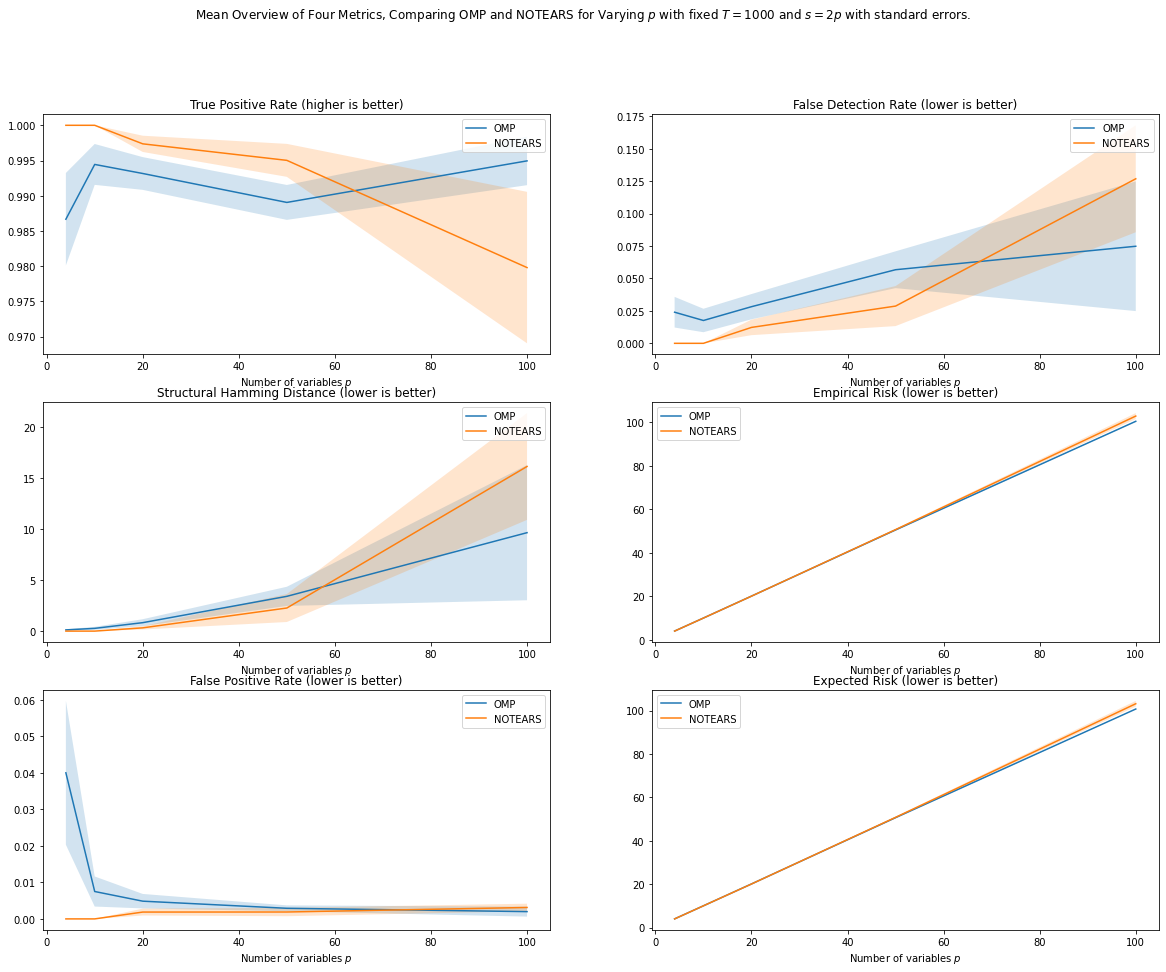

In [234]:
fig, axs = plt.subplots((u_lim - 1) // 2, 2, figsize = (20, 15))
fig.suptitle("Mean Overview of Four Metrics, Comparing OMP and NOTEARS for Varying $p$ with fixed $T = 1000$ and $s = 2p$ with standard errors.")
titles = ['True Positive Rate (higher is better)', 'False Detection Rate (lower is better)', 'Structural Hamming Distance (lower is better)', 'Empirical Risk (lower is better)', 'False Positive Rate (lower is better)', 'Expected Risk (lower is better)']

for i in range(0, u_lim - 1):
    axs[i // 2, i % 2].plot(Ps_OMP, OMP_means[:, i + 1], label = "OMP")
    axs[i // 2, i % 2].fill_between(Ps_OMP, OMP_means[:, i + 1] - OMP_ses[:, i + 1], OMP_means[:, i + 1] + OMP_ses[:, i + 1], alpha = 0.2)

    if len(Ps_NT) > 0:
        axs[i // 2, i % 2].plot(Ps_NT, NT_means[:, i + 1], label = "NOTEARS")
        axs[i // 2, i % 2].fill_between(Ps_NT, NT_means[:, i + 1] - NT_ses[:, i + 1], NT_means[:, i + 1] + NT_ses[:, i + 1], alpha = 0.2)
    
    axs[i // 2, i % 2].set_title(titles[i])
    
    axs[i // 2, i % 2].legend()
    
for ax in axs.flat:
    ax.set(xlabel='Number of variables $p$', ylabel='')
    

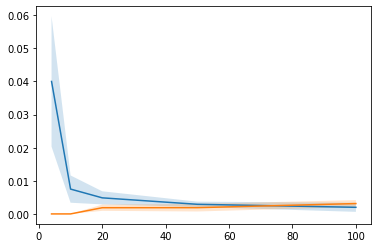

In [211]:
plt.plot(Ps_OMP, OMP_means[:, 5], label = "OMP")
plt.fill_between(Ps_OMP, OMP_means[:, 5] - OMP_ses[:, 5], OMP_means[:, 5] + OMP_ses[:, 5], alpha = 0.2)

plt.plot(Ps_NT, NT_means[:, 5], label = "NOTEARS")
plt.fill_between(Ps_NT, NT_means[:, 5] - NT_ses[:, 5], NT_means[:, 5] + NT_ses[:, 5], alpha = 0.2)